In [28]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from gensim.models import TfidfModel
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
from nltk.util import ngrams
import numpy as np

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\giulia
[nltk_data]     macis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
DF = pd.read_csv("C:/Users/giulia macis/Desktop/UBISOFT/badvideogames/youtube_comments_3kbP1FcH060.csv")
#DF = pd.read_csv(r'C:\Users\giulia macis\Desktop\UBISOFT\badvideogames\youtube_comments_eL57K6LLUfA.csv')
DF

,URL,title,releaseDate,author,comment,publishedTimeText,replyCount,voteCount
0,https://www.youtube.com/watch?v=3kbP1FcH060,Concord Review,2024-08-27T19:35:34Z,@Base12-i2x,Wow….this is definitely better than brothershi...,2024-11-09T01:04:33Z,0,1
1,https://www.youtube.com/watch?v=3kbP1FcH060,Concord Review,2024-08-27T19:35:34Z,@blaqjosh6349,We need a response to this score,2024-11-09T00:15:55Z,0,0
2,https://www.youtube.com/watch?v=3kbP1FcH060,Concord Review,2024-08-27T19:35:34Z,@kittypaisley2029,Concord: 7/10\nBeat the Beat Rhythm Paradise: ...,2024-11-05T15:46:57Z,0,0
3,https://www.youtube.com/watch?v=3kbP1FcH060,Concord Review,2024-08-27T19:35:34Z,@kumatmebro315,I watched 4 minutes of this review and it felt...,2024-11-05T08:19:22Z,0,1
4,https://www.youtube.com/watch?v=3kbP1FcH060,Concord Review,2024-08-27T19:35:34Z,@Hestoomi,Who's here after they gave Brothership a 5? IG...,2024-11-05T05:32:17Z,1,3
...,...,...,...,...,...,...,...,...
2420,https://www.youtube.com/watch?v=3kbP1FcH060,Concord Review,2024-08-27T19:35:34Z,@TheMiraculousVillain,STOP WITH THE 7/10! 😡,2024-08-27T19:36:39Z,0,1
2421,https://www.youtube.com/watch?v=3kbP1FcH060,Concord Review,2024-08-27T19:35:34Z,@Bubbalove007,Be nice in the comments 👀,2024-08-27T19:36:25Z,1,0
2422,https://www.youtube.com/watch?v=3kbP1FcH060,Concord Review,2024-08-27T19:35:34Z,@Elibbb-sx3kg,The magic number has been returned,2024-08-27T19:36:22Z,0,38
2423,https://www.youtube.com/watch?v=3kbP1FcH060,Concord Review,2024-08-27T19:35:34Z,@CoolaBoola,7,2024-08-27T19:36:20Z,0,0


In [30]:
custom_stopwords = set(stopwords.words('english'))
custom_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 'best offer',
    'IGN','ig n', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review'
])
new_stopwords = set(stopwords.words('english'))
new_stopwords.update([
    'good', 'like', 'concord', 'take', 'studio', 'got', 'people', 'get', 'best offer'
    'IGN','ign', 'make', 'made', 'even', 'never', 'always', 'playing', 'online', 
    'feel', 'play', 'im', 'com', 'net', 'org', 'io', 'govedume', 'need', 
    'finish', 'time', 'Mr', 'St', 'Mrs', 'Ms', 'Dr', 'play', 'really', 
    'just', 'dont', 'think', 'know', 'much', 'watching', 'well', 'actually', 
    'its', 'literally', 'basically', 'probably', 'kinda', 'sorta', 
    'definitely', 'obviously', 'youre', 'theyre', 'dont', 'cant', 'wont', 
    'couldve', 'shouldve', 'didnt', 'aint', 'gameplay', 'controls', 
    'levels', 'update', 'patch', 'dev', 'continue', 'way','score','video','review',
    'sparking', 'wow','better','hopefully','audience','overall','charming',"game",
    "player","gave","give","come","lol","day","right","guy"
])
lmtzr = WordNetLemmatizer()

In [31]:
# Define reusable functions

def preprocess_text(text):
    """Preprocess text by lowercasing, removing punctuation, tokenizing, and filtering stopwords."""
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text.lower().translate(str.maketrans('', '', string.punctuation)))
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in custom_stopwords and len(word) >= 3]
    return ' '.join(tokens)

def get_sentiment(text):
    """Classify sentiment of text as positive, negative, or neutral."""
    score = analyzer.polarity_scores(text)
    negative_words = ["suck", "sucks", "done", "worst", "hate", "disappointed", "disgusted","shit","dog shit", ]
    if any(word in text.lower() for word in negative_words):
        return 'negative'
    elif score['compound'] >= 0.01:
        return 'positive'
    elif score['compound'] <= -0.01:
        return 'negative'
    else:
        return 'neutral'

def text_processing(texts):
    """Further clean and tokenize text for topic modeling."""
    texts = [re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
    texts = [[word for word in text.lower().split()] for text in texts]
    texts = [[lmtzr.lemmatize(word) for word in text if word not in new_stopwords and len(word) >= 3] for text in texts]
    return texts

def bigram_analysis(comments, top_n=30):
    """Generate bigrams from tokenized comments and plot the frequency distribution."""
    all_tokens = [word_tokenize(comment) for comment in comments]
    all_ngrams = [ngram for tokens in all_tokens for ngram in ngrams(tokens, 2)]
    freq_dist_ngrams = FreqDist(all_ngrams)
    
    # Convert to DataFrame and sort
    df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])
    df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)
    
    # Plot top n bigrams
    plt.figure(figsize=(12, 6))
    plt.bar(
        df_ngrams['n-gram'][:top_n].apply(lambda x: ' '.join(x)),  
        df_ngrams['frequency'][:top_n]
    )
    plt.title(f'Top {top_n} Bigram Frequency Distribution')
    plt.xlabel('Bigrams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()
    
    return df_ngrams


In [32]:
# Convert to datetime and extract only the date part
DF['releaseDate'] = pd.to_datetime(DF['releaseDate'].astype(str).str.replace('Z', '')).dt.date
DF['publishedTimeText'] = pd.to_datetime(DF['publishedTimeText'].astype(str).str.replace('Z', '')).dt.date

# Define the one-week period after the release date
release_date = DF['releaseDate'][0]
one_week_after_release = release_date + pd.DateOffset(weeks=1)
one_week_after_release = one_week_after_release.date()  # Convert to date format

# Filter for comments within the first week after the release date
df = DF[(DF['publishedTimeText'] >= release_date) & (DF['publishedTimeText'] <= one_week_after_release)]

# Select relevant columns and preprocess comments
df = df[['publishedTimeText', 'comment']]
df['processed_comments'] = df['comment'].apply(preprocess_text)

# Display the filtered DataFrame
df


,publishedTimeText,comment,processed_comments
807,2024-09-03,1:00 that didn't age well,100 age
808,2024-09-03,7/2....😅,72😅
809,2024-09-03,Age well. It did not. \nRefund you must,age refund must
810,2024-09-03,"We all need to apologize to IGN, guys. The 7 w...",apologize ign guy number day ign predicted con...
811,2024-09-03,Hahahahahahahah!,hahahahahahahah
...,...,...,...
2420,2024-08-27,STOP WITH THE 7/10! 😡,stop 710
2421,2024-08-27,Be nice in the comments 👀,nice comment
2422,2024-08-27,The magic number has been returned,magic number returned
2423,2024-08-27,7,


In [33]:
# Randomly sample 500 rows with a fixed random_state for reproducibility
df = df.sample(n=500, random_state=0).reset_index(drop=True)  # Use any integer as the random_state

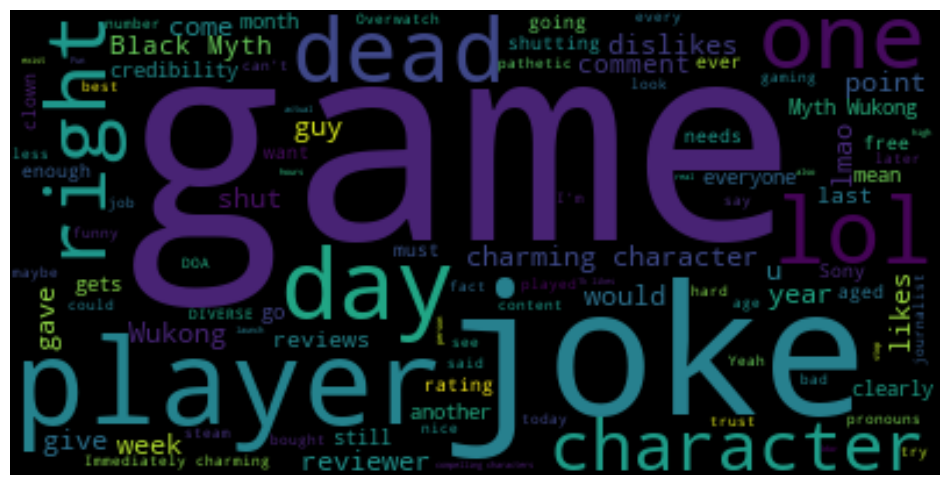

In [34]:
# WordCloud Visualization
word_cloud_text = ' '.join(df['comment'].dropna())
wordcloud = WordCloud(max_words=100, stopwords=custom_stopwords, random_state=1).generate(word_cloud_text)
plt.figure(figsize=(12, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['sentiment'] = df['processed_comments'].apply(get_sentiment)
most_common_sentiment = df['sentiment'].value_counts().idxmax()
print(f'The video has mostly {most_common_sentiment} comments.')
df['sentiment']=='positive'

The video has mostly neutral comments.


0      False
1      False
2       True
3       True
4      False
       ...  
495     True
496    False
497     True
498    False
499    False
Name: sentiment, Length: 500, dtype: bool

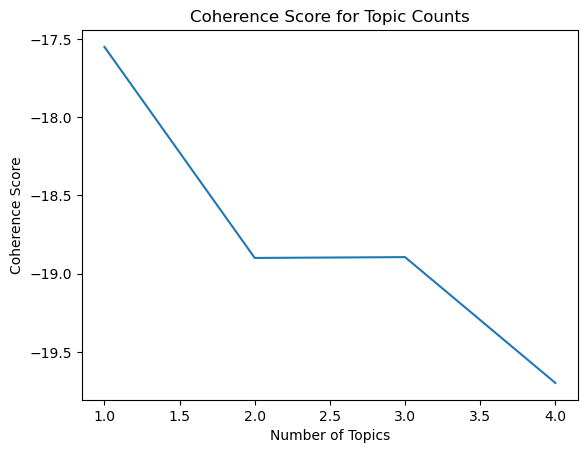

In [36]:
# Topic Modeling
data = text_processing(df['processed_comments'].values.tolist())
dictionary = Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]
tfidf = TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

# Coherence Analysis for Topic Modeling
np.random.seed(1)
k_range = range(1, 5)
scores = []
for k in k_range:
    lda_model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=k, passes=20)
    cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
    scores.append(cm.get_coherence())

plt.figure()
plt.plot(k_range, scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Topic Counts")
plt.show()


In [37]:
# Final LDA Model with Optimal Number of Topics
optimal_k = 1
model = ldamodel.LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=optimal_k, passes=20)
print(model.show_topics())

[(0, '0.011*"joke" + 0.007*"character" + 0.006*"dislike" + 0.005*"dead" + 0.004*"wukong" + 0.004*"lmao" + 0.003*"one" + 0.003*"week" + 0.003*"aged" + 0.003*"comment"')]


The coherence score starts high with 1 topic and decreases sharply, meaning that adding more topics reduces significantly the coherence score.

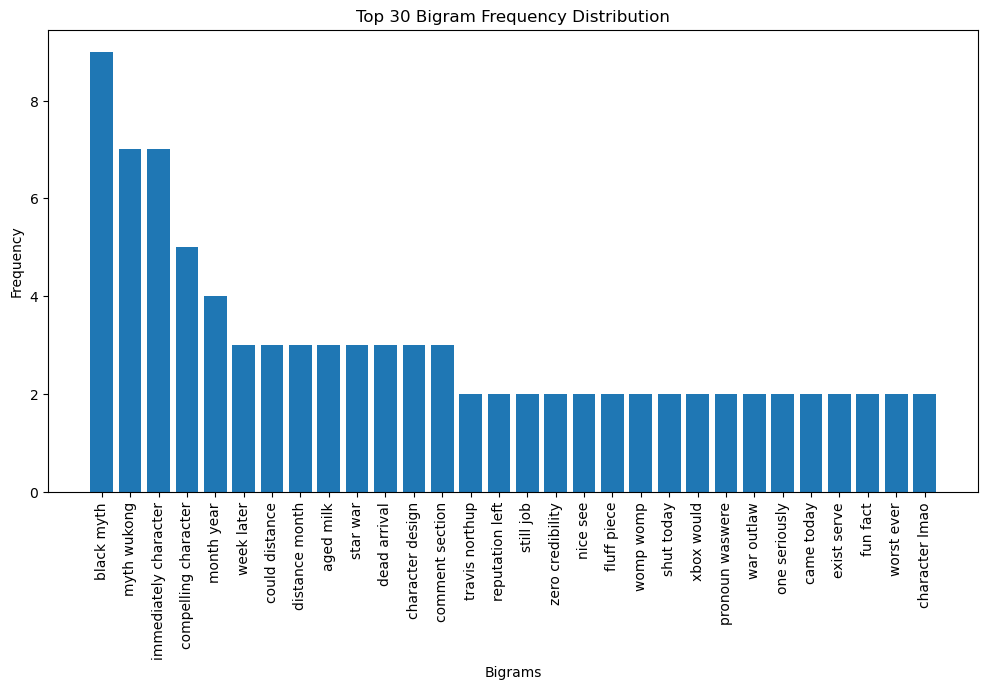

In [39]:
data_as_strings = [' '.join(tokens) for tokens in data]
df_ngrams = bigram_analysis(data_as_strings)

In [40]:
#Load the existing df_topics CSV file
#title=DF['title'].unique()
#file_path = r'C:/Users/giulia macis/Desktop/UBISOFT/df_bad_topics.csv'
#df_bad_topics = pd.read_csv(file_path)
#Append the new row to the DataFrame
#new_row = pd.DataFrame({'title': title, 'num_topics': optimal_k})
#df_bad_topics = pd.concat([df_bad_topics, new_row], ignore_index=True)
# Save the updated DataFrame back to the CSV file
#df_bad_topics.to_csv(file_path, index=False)
#df_bad_topics

,title,num_topics
0,The Last of Us Part II - Angry Review,1
1,Fallout 76 Angry Review,1
2,Is Kingdom Come Deliverance Racist?,1
3,"So far, I do not recommend: Battlefield 2042 (...",4
4,Call of Duty: Modern Warfare 3 Single-Player C...,1
5,Suicide Squad: Kill the Justice League Review,3
6,Atomic Heart is 2023's First Major Disappointm...,2
7,Concord Review,1
